In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:

df=pd.read_csv("bank-marketing.csv")       
      
df.head()

age           job  salary  marital  education targeted default  balance  \
0   58    management  100000  married   tertiary      yes      no     2143   
1   44    technician   60000   single  secondary      yes      no       29   
2   33  entrepreneur  120000  married  secondary      yes      no        2   
3   47   blue-collar   20000  married    unknown       no      no     1506   
4   33       unknown       0   single    unknown       no      no        1   

  housing loan  contact  day month  duration  campaign  pdays  previous  \
0     yes   no  unknown    5   may       261         1     -1         0   
1     yes   no  unknown    5   may       151         1     -1         0   
2     yes  yes  unknown    5   may        76         1     -1         0   
3     yes   no  unknown    5   may        92         1     -1         0   
4      no   no  unknown    5   may       198         1     -1         0   

  poutcome response  
0  unknown       no  
1  unknown       no  
2  unknown       no  
3  unknown       no  
4  unknown       no

In [ ]:
#Drop column "contact" which is useless
df = df.drop('contact', axis=1)

In [ ]:
df.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

#### Describe the pdays column, make note of the mean, median and minimum values. Anything fishy in the values?

In [ ]:
print(df.pdays.describe())


count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64


In [ ]:
print(df.pdays.value_counts().head(1))

-1    36954
Name: pdays, dtype: int64


In [ ]:
df.shape

(45211, 18)

#### Describe the pdays column again, this time limiting yourself to the relevant values of pdays. How different are the mean and the median values?



In [ ]:
df_up = df[df.pdays != -1]


In [ ]:
df_up.pdays.describe()

count    8257.000000
mean      224.577692
std       115.344035
min         1.000000
25%       133.000000
50%       194.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

In [ ]:
# Delete the rows which column 'poutcome' contains 'other'
condition = df.poutcome == 'other'
df = df.drop(df[condition].index, axis = 0, inplace = False)

df[['job','education']] = df[['job','education']].replace(['unknown'],'other')

In [ ]:

#  Drop customer values with 'other' education
condition3 = (df['education'] == 'other')
df = df.drop(df[condition3].index, axis = 0, inplace = False)

#### Plot a horizontal bar graph with the median values of balance for each education level value. Which group has the highest median?

In [ ]:
bardf=df.groupby(['education'])['balance'].median()
bardf

education
primary      398
secondary    387
tertiary     572
Name: balance, dtype: int64

In [ ]:
print(bardf.idxmax(),' has highest median value with {}'.format(bardf.max()))


tertiary  has highest median value with 572


In [ ]:
from matplotlib import *
import seaborn as sns
plt.figure(figsize=(10,4))
bardf=pd.DataFrame(bardf)
mycolors=('y','y','b')
bardf.plot.barh(color=mycolors)
plt.ylabel('Education')
plt.xlabel('Balance')
plt.title('Grouping Education based on balance')


Text(0.5, 1.0, 'Grouping Education based on balance')

<Figure size 720x288 with 0 Axes>

#### Make a box plot for pdays. Do you see any outliers?


Text(0.5, 1.0, 'Without filtering')


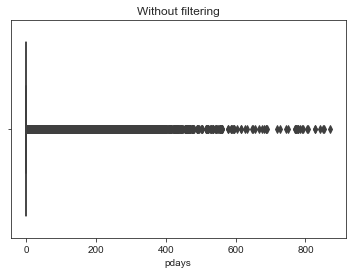

In [ ]:
print(sns.boxplot(x=df['pdays']).set_title('Without filtering'))


Text(0.5, 1.0, 'With filtering pdays column')


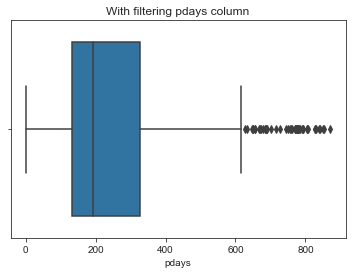

In [ ]:
print(sns.boxplot(x=df_up['pdays']).set_title('With filtering pdays column'))


#### We have outliers which are greater thn 600in pdayss column after filtering also.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
num_var=list(df.select_dtypes(exclude='object').columns)
df[num_var]

age  salary  balance  day  duration  campaign  pdays  previous
0       58  100000     2143    5       261         1     -1         0
1       44   60000       29    5       151         1     -1         0
2       33  120000        2    5        76         1     -1         0
5       35  100000      231    5       139         1     -1         0
6       28  100000      447    5       217         1     -1         0
...    ...     ...      ...  ...       ...       ...    ...       ...
45205   25   60000      505   17       386         2     -1         0
45206   51   60000      825   17       977         3     -1         0
45207   71   55000     1729   17       456         2     -1         0
45208   72   55000     5715   17      1127         5    184         3
45209   57   20000      668   17       508         4     -1         0

[41579 rows x 8 columns]

In [ ]:
cat_var=list(df.select_dtypes(exclude=[np.number]).columns)
df[cat_var]

job   marital  education targeted default housing loan month  \
0        management   married   tertiary      yes      no     yes   no   may   
1        technician    single  secondary      yes      no     yes   no   may   
2      entrepreneur   married  secondary      yes      no     yes  yes   may   
5        management   married   tertiary      yes      no     yes   no   may   
6        management    single   tertiary       no      no     yes  yes   may   
...             ...       ...        ...      ...     ...     ...  ...   ...   
45205    technician    single  secondary      yes      no      no  yes   nov   
45206    technician   married   tertiary      yes      no      no   no   nov   
45207       retired  divorced    primary      yes      no      no   no   nov   
45208       retired   married  secondary      yes      no      no   no   nov   
45209   blue-collar   married  secondary      yes      no      no   no   nov   

      poutcome response  
0      unknown       no  
1      unknown       no  
2      unknown       no  
5      unknown       no  
6      unknown       no  
...        ...      ...  
45205  unknown      yes  
45206  unknown      yes  
45207  unknown      yes  
45208  success      yes  
45209  unknown       no  

[41579 rows x 10 columns]

### bi variate analysis

In [ ]:
sns.pairplot(df, hue='response', palette="husl")


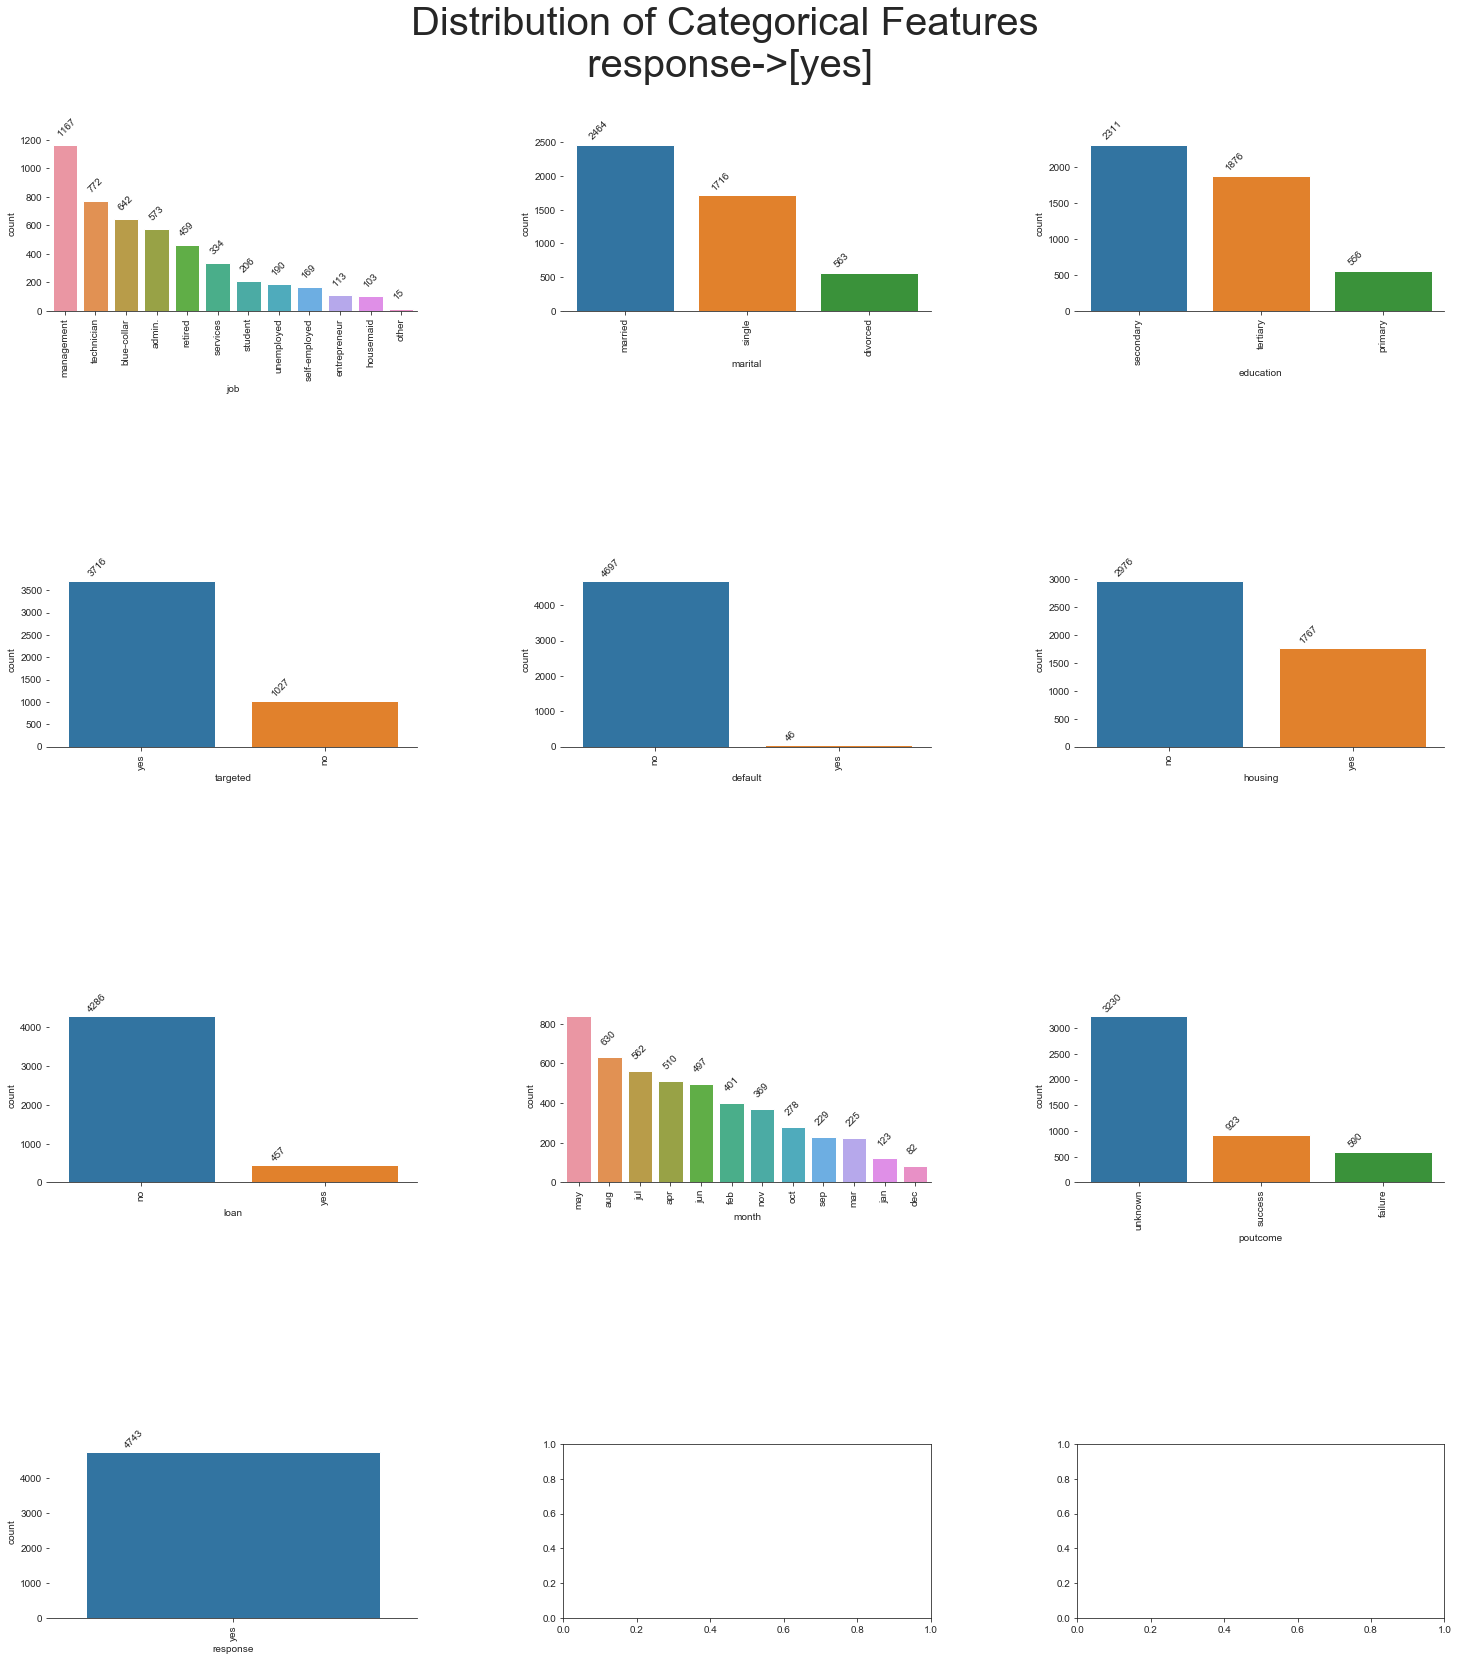

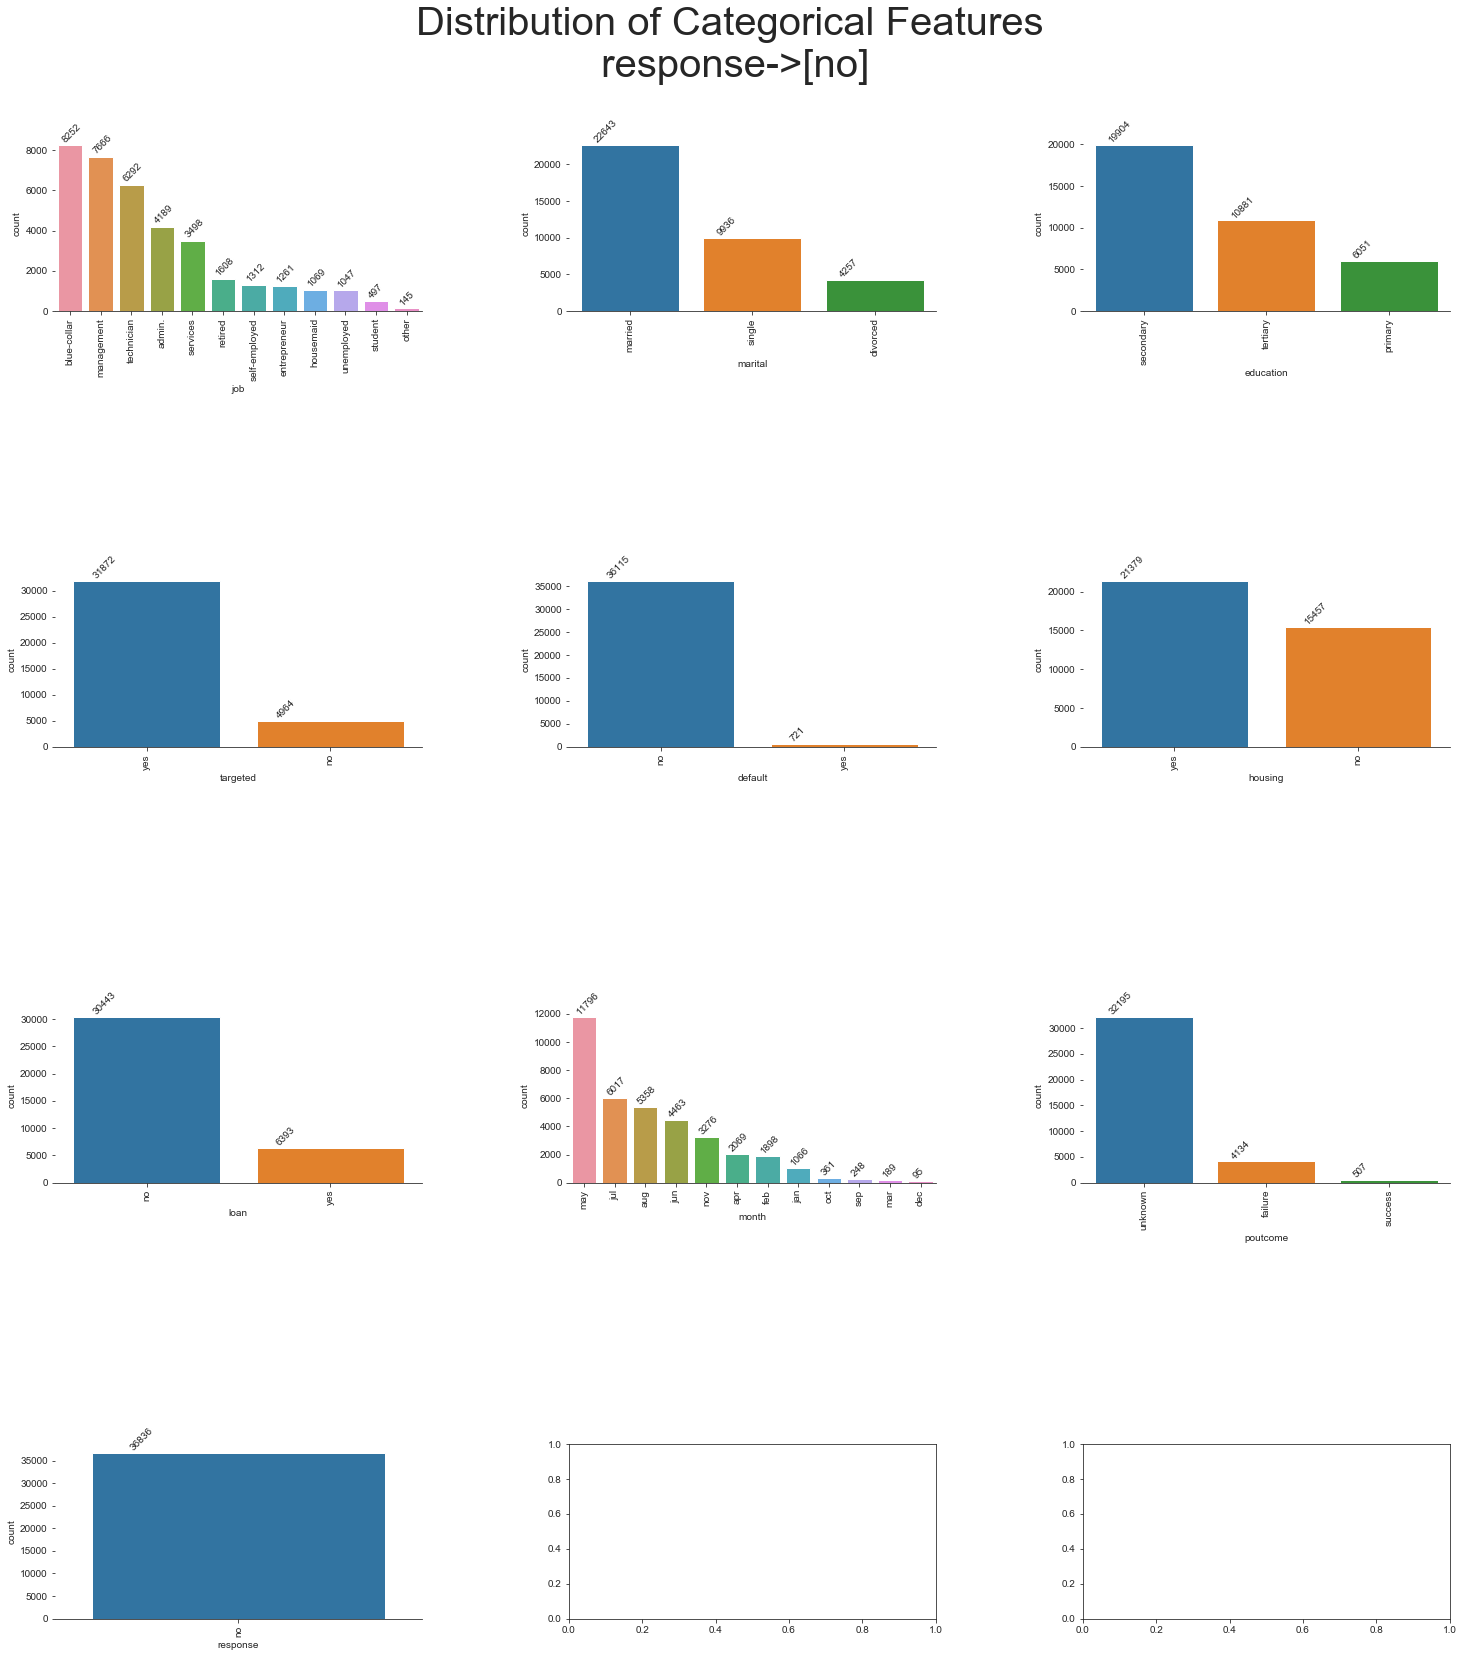

In [ ]:
res=['yes','no']
for i in res:
    sns.set_style("ticks")
    fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(25, 21))
    fig.suptitle("Distribution of Categorical Features\n response->[{}]".format(i),
             horizontalalignment='center', y=1.05,
             verticalalignment='center', fontsize=40)
    fig.subplots_adjust(top=0.99, bottom=0.01, hspace=1.5, wspace=0.4)
    for ax, c in list(zip(axes.flat, cat_var)):        
        sns.countplot(c, data=df[df['response']=='{}'.format(i)],order= df[df['response']=='{}'.format(i)][c].value_counts().index,
                  ax=ax)
        for p in ax.patches:
            ax.annotate("{}".format(p.get_height()), (p.get_x()+0.1, p.get_height()+50),
                       ha='left', va='bottom', rotation=45)
        ax.tick_params(labelrotation=90)  
        plt.sca(ax)
        plt.yticks(rotation=0)    
         # ax.axis('off')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(True)
        ax.spines['left'].set_visible(False)

In [ ]:
df_grouped = df.groupby("response")
class_name_no = "no"
class_name_yes = "yes"
df_grouped_no = df_grouped.get_group(class_name_no)
df_grouped_yes =df_grouped.get_group(class_name_yes)


Text(0, 0.5, 'Count')

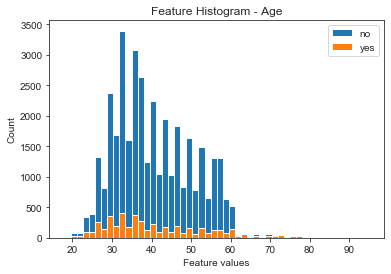

In [ ]:
 plt.figure()
plt.hist(df_grouped_no['age'], bins=50, label=class_name_no)
plt.hist(df_grouped_yes['age'], bins=50, label=class_name_yes)
plt.legend()
plt.title("Feature Histogram - Age")
plt.xlabel("Feature values")
plt.ylabel("Count")



In [ ]:
#HEAT MAP

f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr(method='spearman'), annot=False, cmap='coolwarm')

In [ ]:
def drawhist(df,feature):
    plt.hist(df[feature])
drawhist(df,'pdays')

In [ ]:
cat_var

['job',
 'marital',
 'education',
 'targeted',
 'default',
 'housing',
 'loan',
 'month',
 'poutcome',
 'response']

In [ ]:
df.response.value_counts()

no     36836
yes     4743
Name: response, dtype: int64

In [ ]:
# Here we are converting this target variabe response into 0's and 1's so that it would easier for algorithm to form a model
def conver(x):
    return x.map({'no':0,'yes':1})
df[['response']]=df[['response']].apply(conver)


In [ ]:
df.response.value_counts()

0    36836
1     4743
Name: response, dtype: int64

In [ ]:
# these are the categorical columns
cat_var

['job',
 'marital',
 'education',
 'targeted',
 'default',
 'housing',
 'loan',
 'month',
 'poutcome',
 'response']

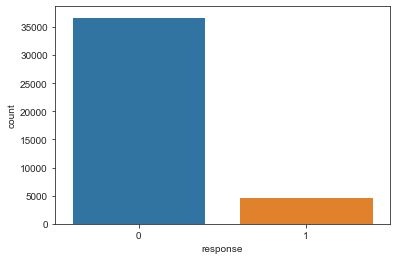

In [ ]:
sns.countplot(x='response', data=df)


In [ ]:
sns.countplot(y='job', data=df)


In [ ]:
sns.countplot(x='marital', data=df)


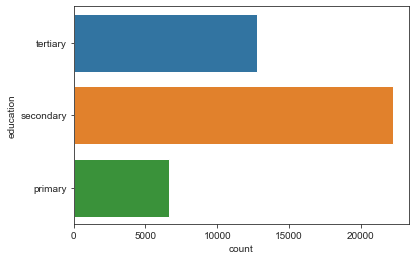

In [ ]:
sns.countplot(y='education', data=df)


### Associations of numerical variables

In [ ]:
dist=df.hist(figsize=(12,10)) # display numerical feature distribution


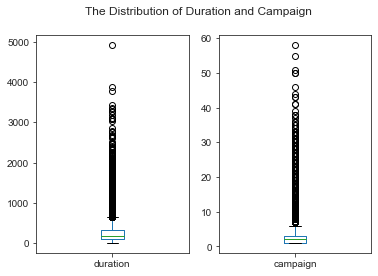

In [ ]:
#distribution of duration of campaign.

dist_dur_cam = df[['duration','campaign']].plot(kind = 'box',subplots = True, layout = (1,2),sharex = False, sharey = False,title='The Distribution of Duration and Campaign')
plt.show()

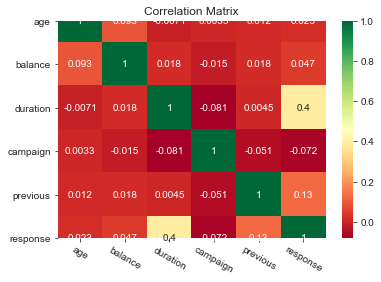

In [ ]:
corr_data = df[['age','balance','duration','campaign','month','previous','response']]
corr = corr_data.corr()

cor_plot = sns.heatmap(corr,annot=True,cmap='RdYlGn')
fig.set_size_inches(6,5)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
lst=['housing','default','loan','targeted']



def conver(x):
    return x.map({'no':0,'yes':1})

for i in lst:
    df[[i]]=df[[i]].apply(conver)

lst=['job','education','marital','month']
for i in lst:
    dummy=pd.get_dummies(df[i],drop_first=True)
    df=pd.concat([df,dummy],axis=1)
    df.drop([i],axis=1,inplace=True)


In [ ]:
df.head()

age  salary  targeted  default  balance  housing  loan  day  duration  \
0   58  100000         1        0     2143        1     0    5       261   
1   44   60000         1        0       29        1     0    5       151   
2   33  120000         1        0        2        1     1    5        76   
5   35  100000         1        0      231        1     0    5       139   
6   28  100000         0        0      447        1     1    5       217   

   campaign  ...  dec  feb  jan  jul  jun  mar  may  nov  oct  sep  
0         1  ...    0    0    0    0    0    0    1    0    0    0  
1         1  ...    0    0    0    0    0    0    1    0    0    0  
2         1  ...    0    0    0    0    0    0    1    0    0    0  
5         1  ...    0    0    0    0    0    0    1    0    0    0  
6         1  ...    0    0    0    0    0    0    1    0    0    0  

[5 rows x 40 columns]

In [ ]:
df.columns

Index(['age', 'salary', 'targeted', 'default', 'balance', 'housing', 'loan',
       'day', 'duration', 'campaign', 'pdays', 'previous', 'response',
       'poutcome_co', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
       'other', 'retired', 'self-employed', 'services', 'student',
       'technician', 'unemployed', 'secondary', 'tertiary', 'married',
       'single', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may', 'nov',
       'oct', 'sep'],
      dtype='object')

In [ ]:
df.response

0        0
1        0
2        0
5        0
6        0
        ..
45205    1
45206    1
45207    1
45208    1
45209    0
Name: response, Length: 41579, dtype: int64

### Train test split

In [ ]:
X=df.drop('response', axis=1)
Y=df['response']


### Predictive model 1: Logistic regression 
#### Make a predictive model using logistic regression



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [ ]:
# 20% of the data will be used for testing
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.2, random_state=7)

In [ ]:
Y_train

24142    0
1847     0
25732    1
25803    0
32343    0
        ..
36514    1
14659    0
1011     0
41457    0
11308    0
Name: response, Length: 33263, dtype: int64

In [ ]:
from sklearn.feature_selection import RFE
import statsmodels.api as sm 


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
df.select_dtypes(include=[np.number])

age  salary  targeted  default  balance  housing  loan  day  duration  \
0       58  100000         1        0     2143        1     0    5       261   
1       44   60000         1        0       29        1     0    5       151   
2       33  120000         1        0        2        1     1    5        76   
5       35  100000         1        0      231        1     0    5       139   
6       28  100000         0        0      447        1     1    5       217   
...    ...     ...       ...      ...      ...      ...   ...  ...       ...   
45205   25   60000         1        0      505        0     1   17       386   
45206   51   60000         1        0      825        0     0   17       977   
45207   71   55000         1        0     1729        0     0   17       456   
45208   72   55000         1        0     5715        0     0   17      1127   
45209   57   20000         1        0      668        0     0   17       508   

       campaign  ...  dec  feb  jan  jul  jun  mar  may  nov  oct  sep  
0             1  ...    0    0    0    0    0    0    1    0    0    0  
1             1  ...    0    0    0    0    0    0    1    0    0    0  
2             1  ...    0    0    0    0    0    0    1    0    0    0  
5             1  ...    0    0    0    0    0    0    1    0    0    0  
6             1  ...    0    0    0    0    0    0    1    0    0    0  
...         ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
45205         2  ...    0    0    0    0    0    0    0    1    0    0  
45206         3  ...    0    0    0    0    0    0    0    1    0    0  
45207         2  ...    0    0    0    0    0    0    0    1    0    0  
45208         5  ...    0    0    0    0    0    0    0    1    0    0  
45209         4  ...    0    0    0    0    0    0    0    1    0    0  

[41579 rows x 40 columns]

In [ ]:
lm = LogisticRegression()
lm.fit(X_train,Y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
rfe = RFE(lm, 10)
rfe = rfe.fit(X_train, Y_train)
rfe_ = X_train.columns[rfe.support_]
rfe_

Index(['housing', 'poutcome_co', 'other', 'student', 'dec', 'jan', 'mar',
       'may', 'oct', 'sep'],
      dtype='object')

These are the columns obtained with RFE.

In [ ]:
# Creating  dataframe with RFE selected variables

x_train_rfe = X_train[rfe_]

In [ ]:
def build_model(X,y):
    X = sm.add_constant(X) 
    #Ading constant
    lm = sm.OLS(y,X).fit() 
    print(lm.summary()) #summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [ ]:
x_train_new = build_model(x_train_rfe,Y_train)


                            OLS Regression Results                            
Dep. Variable:               response   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     338.3
Date:                Fri, 03 Jan 2020   Prob (F-statistic):               0.00
Time:                        22:39:25   Log-Likelihood:                -7617.2
No. Observations:               33263   AIC:                         1.526e+04
Df Residuals:                   33252   BIC:                         1.535e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2557      0.005     50.370      

In [ ]:
x_train_rfe

housing  poutcome_co  other  student  dec  jan  mar  may  oct  sep
24142        0            1      0        0    0    0    0    0    0    0
1847         1            1      0        0    0    0    0    1    0    0
25732        0            1      0        0    0    0    0    0    0    0
25803        0            1      0        0    0    0    0    0    0    0
32343        1            1      0        0    0    0    0    0    0    0
...        ...          ...    ...      ...  ...  ...  ...  ...  ...  ...
36514        0            0      0        0    0    0    0    1    0    0
14659        1            1      0        0    0    0    0    0    0    0
1011         1            1      0        0    0    0    0    1    0    0
41457        0            0      1        0    0    0    0    0    0    1
11308        0            1      0        0    0    0    0    0    0    0

[33263 rows x 10 columns]

In [ ]:
checkVIF(x_train_new)


Features   VIF
0         const  9.26
1       housing  1.25
8           may  1.25
2   poutcome_co  1.04
10          sep  1.03
6           jan  1.02
9           oct  1.02
4       student  1.01
5           dec  1.01
7           mar  1.01
3         other  1.00

In [ ]:
x_train_new = x_train_new.drop('const',axis=1)


In [ ]:
checkVIF(x_train_new)


Features   VIF
0      housing  2.39
1  poutcome_co  1.94
7          may  1.78
5          jan  1.03
3      student  1.02
2        other  1.01
6          mar  1.01
8          oct  1.01
9          sep  1.01
4          dec  1.00

In [ ]:
x_train_new = x_train_new.drop('housing',axis=1)


In [ ]:
x_train_new = build_model(x_train_new,Y_train)


                            OLS Regression Results                            
Dep. Variable:               response   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     340.3
Date:                Fri, 03 Jan 2020   Prob (F-statistic):               0.00
Time:                        22:39:39   Log-Likelihood:                -7763.0
No. Observations:               33263   AIC:                         1.555e+04
Df Residuals:                   33253   BIC:                         1.563e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2221      0.005     47.236      

In [ ]:
x_train_new = x_train_new.drop(columns=['other','jan'])


In [ ]:
checkVIF(x_train_new)


Features   VIF
0        const  7.67
1  poutcome_co  1.03
5          may  1.02
6          oct  1.02
7          sep  1.02
2      student  1.01
3          dec  1.01
4          mar  1.01

In [ ]:
x_train_new = build_model(x_train_new,Y_train)


                            OLS Regression Results                            
Dep. Variable:               response   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     435.8
Date:                Fri, 03 Jan 2020   Prob (F-statistic):               0.00
Time:                        22:39:48   Log-Likelihood:                -7768.7
No. Observations:               33263   AIC:                         1.555e+04
Df Residuals:                   33255   BIC:                         1.562e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2199      0.005     47.372      

In [ ]:
x_train_new = x_train_new.drop('const',axis=1)


In [ ]:
checkVIF(x_train_new)


Features   VIF
0  poutcome_co  1.39
4          may  1.36
1      student  1.02
3          mar  1.01
5          oct  1.01
6          sep  1.01
2          dec  1.00

In [ ]:
feats=list(x_train_new.columns)

In [ ]:
#now  for selected features we have to form a model and check accuracy
lm_sel = LogisticRegression()
lm_sel.fit(X_train[feats],Y_train)



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
auc=[X_train,X_train[feats]]
results_c = []
names_c = []
models = []
models.append(('LogisticRegression', LogisticRegression()))
for i in auc:
        kfold = KFold(n_splits=10, random_state=7)    
        # train the model
        cv_results = cross_val_score(LogisticRegression(), i, Y_train, cv=kfold, scoring='accuracy')    
        results_c.append(cv_results)
        names_c.append(name)
        msg = "%s: %f (%f)" % (LogisticRegression, cv_results.mean(), cv_results.std())
        print(msg)

<class 'sklearn.linear_model.logistic.LogisticRegression'>: 0.891080 (0.004696)
<class 'sklearn.linear_model.logistic.LogisticRegression'>: 0.885579 (0.005362)


### logistic regression achieved an accuracy of about 88%, suggesting a high level of strength of this model to classify the customer response given all the defined customer features.

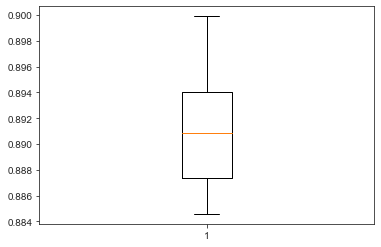

In [ ]:
plt.boxplot(results_c)
plt.show()

In [ ]:
predictions = lm.predict(X_test)
pred_selected=lm_sel.predict(X_test[feats])

In [ ]:
print('For all features')
print(accuracy_score(Y_test, predictions))
print('For selected features')
print(accuracy_score(Y_test, pred_selected))


For all features
0.8940596440596441
For selected features
0.8923761423761424


In [ ]:
rfe=list(x_train_new)

selected=X_train[]

In [ ]:
# Confusion Matrix 

from sklearn.metrics import confusion_matrix

print(confusion_matrix(Y_test, predictions))

[[7293  114]
 [ 767  142]]


In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print('This is for all features')
print(classification_report(Y_test, predictions))

This is for all features
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7407
           1       0.55      0.16      0.24       909

    accuracy                           0.89      8316
   macro avg       0.73      0.57      0.59      8316
weighted avg       0.87      0.89      0.87      8316



In [ ]:
print('This is for selected features')
print(classification_report(Y_test, pred_selected))

This is for selected features
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7407
           1       0.55      0.09      0.15       909

    accuracy                           0.89      8316
   macro avg       0.72      0.54      0.55      8316
weighted avg       0.86      0.89      0.86      8316



### Which features are the most important from your model?

In [ ]:
rfe=list(x_train_new)
print('These are the most important features for our model to make accurate predictions',rfe)

These are the most important features for our model to make accurate predictions ['poutcome_co', 'student', 'dec', 'mar', 'may', 'oct', 'sep']


### Predictive model 2: Random Forest

#### Make a predictive model using random forest technique

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
model = RandomForestClassifier(n_estimators=18)
model.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=18,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
Y_pred=model.predict(X_test)
conf_mat=confusion_matrix(Y_test,Y_pred)
index=['actual No','actual yes']
columns=['predicted no','predicted yes']
demo=pd.DataFrame(conf_mat,index=index,columns=columns)
demo

predicted no  predicted yes
actual No           7207            200
actual yes           606            303

In [ ]:
from sklearn.metrics import *

In [ ]:
print('Recall score',round(recall_score(Y_test,Y_pred),2))
print('Precision score',round(precision_score(Y_test,Y_pred),2))

Recall score 0.33
Precision score 0.6


In [ ]:
a=[X_train,X_train[feats]]


In [ ]:
for i in a:
    kfold = KFold(n_splits=10, random_state=7)    
    cv_results = cross_val_score(LogisticRegression(), i, Y_train, cv=kfold, scoring='accuracy')  
    print('Cross validation score:',cv_results.mean())

Cross validation score: 0.8910802412738141
Cross validation score: 0.8855786698274526


In [ ]:
model_s = RandomForestClassifier(n_estimators=18)
model_s.fit(X_train[feats], Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=18,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
Y_pred_=model_s.predict(X_test[feats])


In [ ]:
print('For all features')
print(accuracy_score(Y_test, Y_pred))
print('For selected features')
print(accuracy_score(Y_test, Y_pred_))

For all features
0.903078403078403
For selected features
0.8915343915343915


In [ ]:
# this is for all for all features
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7407
           1       0.60      0.33      0.43       909

    accuracy                           0.90      8316
   macro avg       0.76      0.65      0.69      8316
weighted avg       0.89      0.90      0.89      8316



In [ ]:
# this is for all for selected features
classification_report(Y_test, Y_pred_)

'              precision    recall  f1-score   support\n\n           0       0.90      0.99      0.94      7407\n           1       0.52      0.10      0.16       909\n\n    accuracy                           0.89      8316\n   macro avg       0.71      0.54      0.55      8316\nweighted avg       0.86      0.89      0.86      8316\n'

In [ ]:
print('Precision score for selected faetures',precision_score(Y_test,Y_pred_))

Precision score for selected faetures 0.52046783625731


### Compare the performance of the Random Forest and the logistic model – 

1. Accuracy score for selected features when we use logistic model is 
 #### 0.8923
 and when we use Random forest model is
 #### 0.8915


2. Precision score for selected features when we use logistic model is
 #### 0.5510
 and when we use Random forest model is
 #### 0.5204

 
3. Cross val score for selected features when we use logistic model is
 #### 0.88557
 and when we use Random forest model is
 #### 0.8855
